Name: Joshua Payapulli
<br>
Github Username: Payapulli

## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Package imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import plot_leverage_resid2
import numpy as np
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler

Get the Cycle Power Plant Data Set

In [2]:
df = pd.read_excel('../data/CCPP/Folds5x2_pp.xlsx')

### (b) Exploring the data

#### i. rows and columns

In [3]:
rows, cols = df.shape
print(f"There are {rows} rows and {cols} columns in the dataset.")

There are 9568 rows and 5 columns in the dataset.


There are 5 columns. The first four are our features which represent the following

- Temperature (AT) - hourly average temperature of the power plant. Between 1.81°C and 37.11°C.
- Exhaust Vacuum (V) - hourly average pressure at the exhaust side of the steam turbine. Between 25.36-81.56 cm Hg.
- Ambient Pressure (AP) - hourly average pressure of the environment surrounding the power plant. Between 992.89-1033.30 millibar.
- Relative Humidity (RH) - hourly average of the water vapor present in the air, as a percentage of the maximum possible amount of water vapor for the same temperature. Between 25.56% to 100.16%. NOTE: the values for relative humidity have an upper bound that is greater than 100% - this could be due to many reasons, such as measurement errors/inaccuracies.


We then have our output variable:

- Net hourly electrical energy output (PE) - net amount of electrical energy produced in an hour.

Each row represents a single data point, of which there are 9568. We are not given information about the frequency of these recordings, just that they were taken over 6 years (2006-2011).

#### ii. pairwise scatterplots of all the varianbles

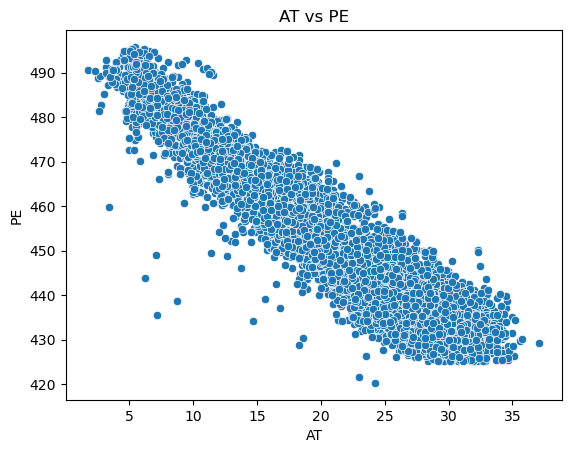

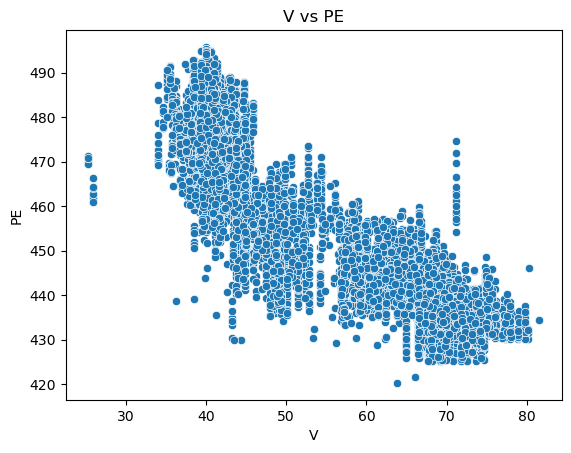

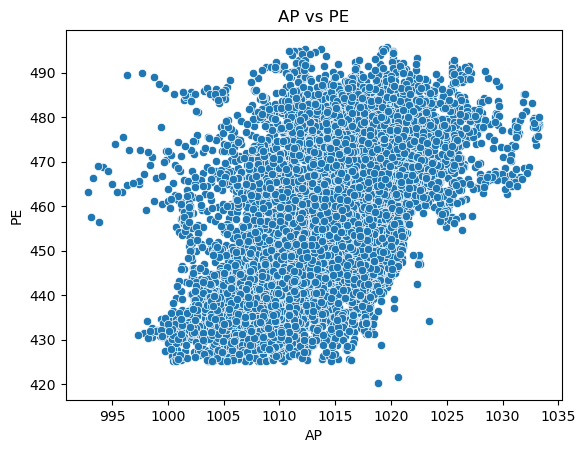

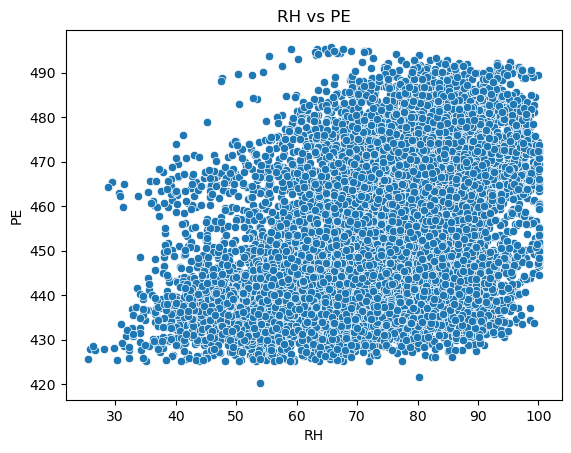

In [4]:
independent_vars, dependent_var = ['AT', 'V', 'AP', 'RH'], 'PE'

for var in independent_vars:
    sns.scatterplot(x=var, y=dependent_var, data=df)
    plt.title(f'{var} vs {dependent_var}')
    plt.show()

**AT vs PE:**

There seems to be a strong negative linear correlation between temperature and net energy output. This correlation is quite clear with only some data points that do not follow the general pattern.

**V vs PE:**

Once again, there seems to be a negative linear correlation between exhaust vacuum and net energy output. This trend is less clear cut than AT vs PE, and there are more data points that do not follow the trend, but the general spread of data is similar.

**AP vs PE:**

There appears to be a weak positive linear correlation between ambient pressure and net energy output. Weak, because the spread of the data is less tight as the previous two plots, and a higher percentage of data points that are outside this general trend.

**RH vs PE:**

There does not appear to be a linear correlation between relative humidity and net energy output. However, relative humidity (RH) seems to act like a sort of threshold for net energy output. For instance, in order to reach net energy output greater than 490, the RH should be around 75 or more. Looking at only >75 RH, there is a random spread of data, so RH seems to not predict net energy output very closely, but instead as a kind of threshold to it. This may also suggest that there is some interaction between RH and one/multiple of the other predictors.

#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [5]:
box_stats = df.describe()

for col in df.columns:
    table = PrettyTable()

    table.field_names = ['Statistic', 'Value']

    # Calculate statistics
    mean = box_stats.loc['mean', col]
    median = df[col].median()
    range_stat = box_stats.loc['max', col] - box_stats.loc['min', col]
    lq = box_stats.loc['25%', col]
    uq = box_stats.loc['75%', col]
    iqr = uq - lq


    # Add statistics to pretty table
    table.add_row(["Mean", f"{mean:.2f}"])
    table.add_row(["Median", f"{median:.2f}"])
    table.add_row(["Range", f"{range_stat:.2f}"])
    table.add_row(["Q1", f"{lq:.2f}"])
    table.add_row(["Q3", f"{uq:.2f}"])
    table.add_row(["IQR", f"{iqr:.2f}"])

    # Print table
    print(f'{col}:')
    print(table)
    print('\n')

AT:
+-----------+-------+
| Statistic | Value |
+-----------+-------+
|    Mean   | 19.65 |
|   Median  | 20.34 |
|   Range   | 35.30 |
|     Q1    | 13.51 |
|     Q3    | 25.72 |
|    IQR    | 12.21 |
+-----------+-------+


V:
+-----------+-------+
| Statistic | Value |
+-----------+-------+
|    Mean   | 54.31 |
|   Median  | 52.08 |
|   Range   | 56.20 |
|     Q1    | 41.74 |
|     Q3    | 66.54 |
|    IQR    | 24.80 |
+-----------+-------+


AP:
+-----------+---------+
| Statistic |  Value  |
+-----------+---------+
|    Mean   | 1013.26 |
|   Median  | 1012.94 |
|   Range   |  40.41  |
|     Q1    | 1009.10 |
|     Q3    | 1017.26 |
|    IQR    |   8.16  |
+-----------+---------+


RH:
+-----------+-------+
| Statistic | Value |
+-----------+-------+
|    Mean   | 73.31 |
|   Median  | 74.97 |
|   Range   | 74.60 |
|     Q1    | 63.33 |
|     Q3    | 84.83 |
|    IQR    | 21.50 |
+-----------+-------+


PE:
+-----------+--------+
| Statistic | Value  |
+-----------+--------+
|   

### (c) Simple Linear Regression

AT results:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:57:18   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.

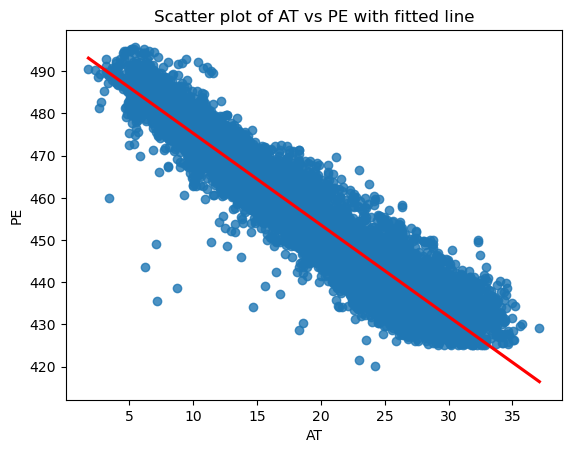

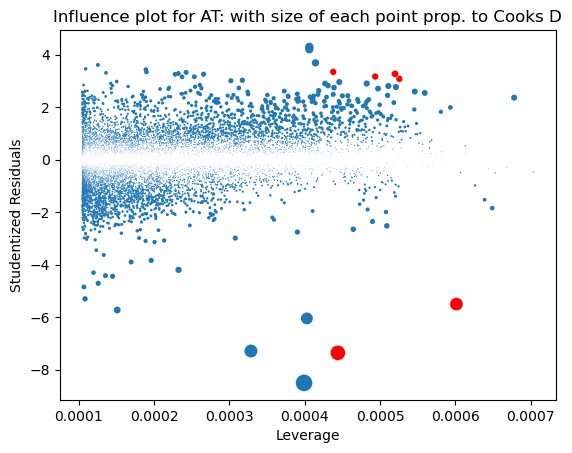

V results:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:57:30   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.2

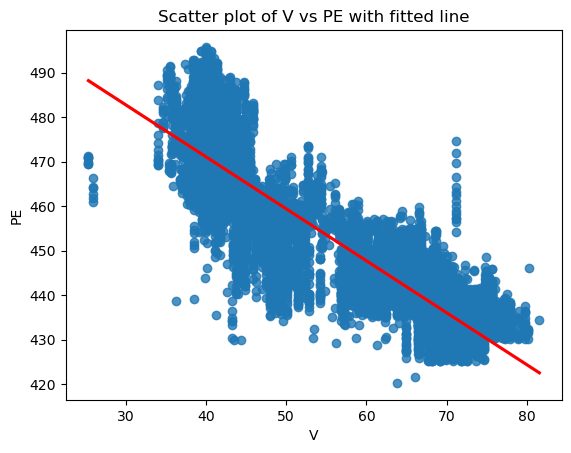

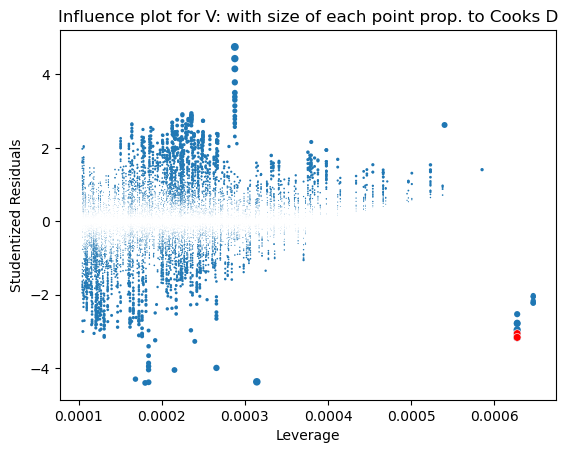

AP results:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:57:41   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.

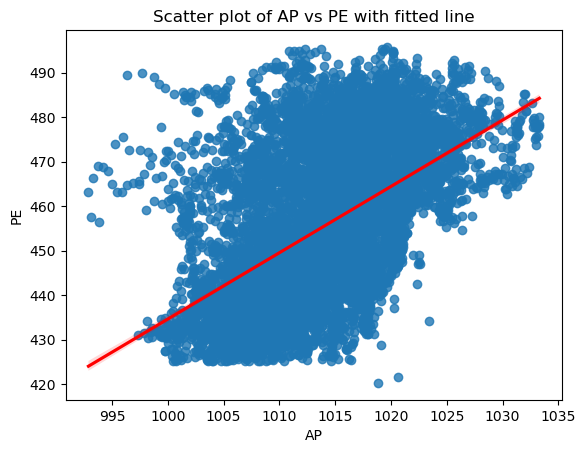

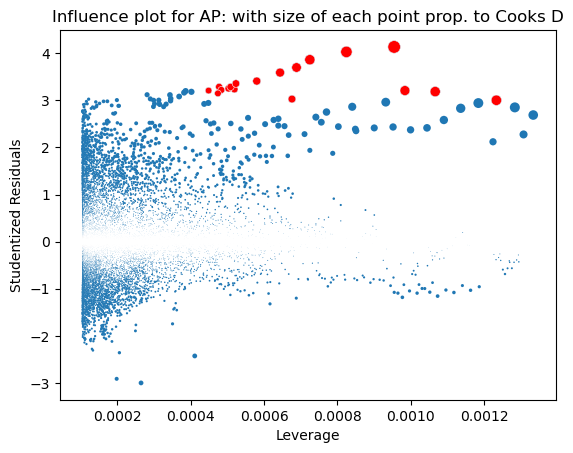

RH results:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:57:51   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511.

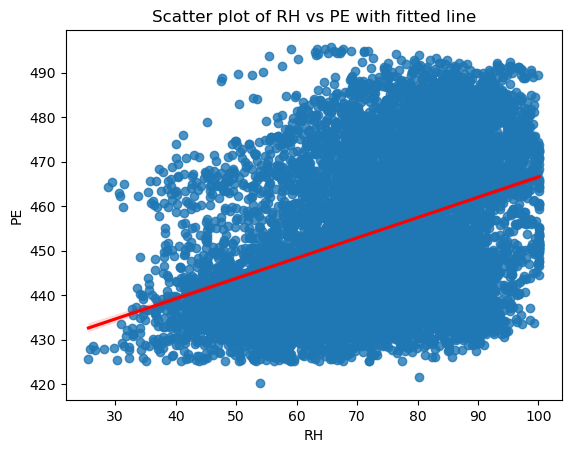

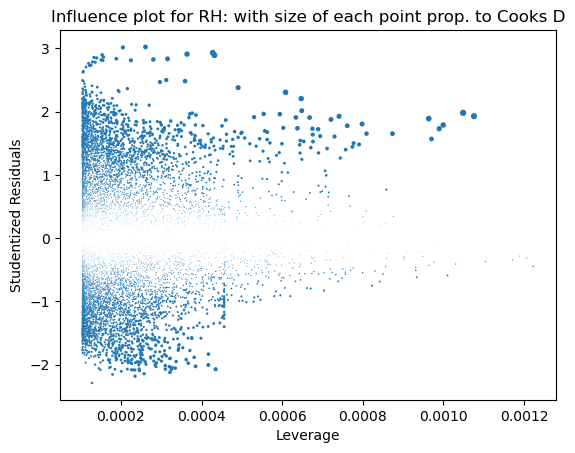

In [6]:
# create the predictors/response split
response = df['PE']
predictors = df.drop(['PE'], axis=1)
outliers_df = pd.DataFrame()
single_reg_coeffs = []

for pred in predictors.columns:
    x, y = predictors[[pred]], response

    # Add a constant term
    x = sm.add_constant(x)

    # Fit the model
    model = sm.OLS(y, x).fit()

    # Print results
    print(f'{pred} results:')
    print(model.summary())
    print("\n")

    # Plotting the original data with fitted line
    sns.regplot(x=pred, y='PE', data=df, line_kws={"color": "red"})
    plt.title(f'Scatter plot of {pred} vs PE with fitted line')
    plt.show()
    
    influence = model.get_influence()
    leverage = influence.hat_matrix_diag
    student_resid = influence.resid_studentized_external

    # Outliers
    residual_cutoff = np.abs(student_resid) > 3
    k = 1 # looking at each predictor one at a time
    leverage_cutoff = 2 * (k + 1) / len(df)
    cutoff = np.logical_and(residual_cutoff, leverage > leverage_cutoff)
    cooks_d = influence.cooks_distance[0]

    # Store outliers in df so we can remove them from the model
    outlier_indices = df.index[cutoff]
    outliers_df = pd.concat([outliers_df, df.loc[outlier_indices]], ignore_index=True)
    
    sns.scatterplot(x=leverage, y=student_resid, s=cooks_d * 10000)
    # Points highlighted in read are my outliers that I will remove
    sns.scatterplot(x=leverage[cutoff], y=student_resid[cutoff], color='red', s=cooks_d[cutoff] * 10000)
    plt.xlabel('Leverage')
    plt.ylabel('Studentized Residuals')
    plt.title(f'Influence plot for {pred}: with size of each point prop. to Cooks D')
    plt.show()

    # Save coeffs for part e
    single_reg_coeffs.append(model.params[pred])

# Drop outliers
outliers_df = outliers_df.drop_duplicates() # removing duplicates
cleaned_df = df.drop(outliers_df.index)

**Statistical significance:**

For all four of the predictor variables, my p-values are effectively zero which is a very strong indication that they are statistically significant. This is further backed up by my scatter plot for each predictor, showing that there is a trend along the regression line for each predictor, although the strength of this trend varies with each predictor.

The R-squared value gives us an indication of how well the predictor can explain the variability in the response, and thus will be more effective at predicting the response.

- Temperature has an R-squared value of 0.899 and therfore explains roughly 90% of the variance in the response so should do very well as a predictor for the response.
- Exhaust Vacuum has an R-squared value of 0.757 and so explains roughly 76% of the variance in the response, so should also be very effective at predicting the response.
- Ambient Pressure has an R-squared value of 0.269, explaining roughly 27% of the variance in the response. We know this is certianly statistically significiant due to its p-value but will be less effective at predicting the response than the previous two predictors.
- Finally, Relative Humidity is also statistically significiant due to its low p-value but has the lowest R-squared value at 0.152, only explaining 15% of the response so as the scatter plot above suggests also, should be the least effective at predicting the response.

**Outliers:**

To detect outliers I have created a influence plot for each predictor. This plot displays leverage against studentized residual, where the size of each point of the plot is proportional to the cooks_distance which measures how much each points influences the regression model. The points I have highlighted as outliers have been highlighted in red in this influence plot, and have been dropped from my model.

### (d) Multiple Regression

In [7]:
x = cleaned_df[['AT', 'V', 'AP', 'RH']]
x = sm.add_constant(x) # Add a constant term
y = cleaned_df['PE']

model = sm.OLS(y, x).fit()

# Save coeffs for part e
mult_reg_coeffs = model.params.drop('const')
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.106e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:58:02   Log-Likelihood:                -28009.
No. Observations:                9542   AIC:                         5.603e+04
Df Residuals:                    9537   BIC:                         5.606e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.2630      9.758     46.552      0.0

**Rejecting the null hypothesis:** 

For all of the single regression models for each predictor, and for the multiple regression model, all the p-values are effectively zero, indicating that all our predictors have strong statistical significant. Therefore, we can reject the null hypothesis for all of our predictors.

Furthermore, the F-statistic is very large, indicating that the model performs well and has very strong explanatory power for the variability in the response. Finally, the R-squared value for the model is 0.929, so our model can explain roughly 93% of the variability in the response variable. Giving us further reason to reject the null hypothesis.

### (e) 1c Compare to 1d

AT -2.171319958517799 -1.9759069755867835
V -1.1681351265557134 -0.23448920377737506
AP 1.4898716733991115 0.06239819699318859
RH 0.45565010226298047 -0.15773799212350975


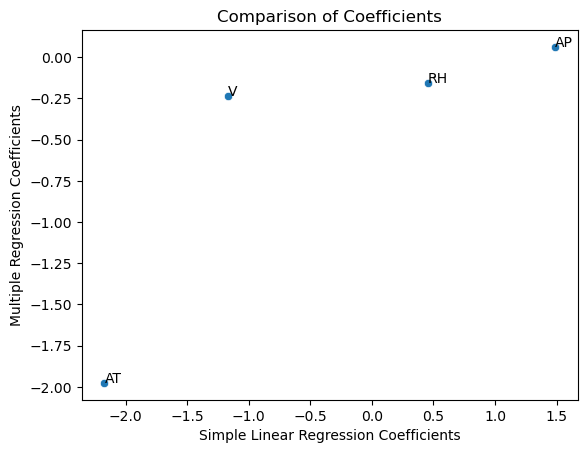

In [8]:
sns.scatterplot(x=single_reg_coeffs, y=mult_reg_coeffs)
plt.xlabel('Simple Linear Regression Coefficients')
plt.ylabel('Multiple Regression Coefficients')
plt.title('Comparison of Coefficients')

# Add predictor labels
for i, pred in enumerate(predictors.columns):
    plt.annotate(pred, (single_reg_coeffs[i], mult_reg_coeffs[i]))
    print(pred, single_reg_coeffs[i], mult_reg_coeffs[i])

plt.show()

**Simple linear regression vs Multiple linear regression:**

- AT - Temperature has changed slightly from -2.17 to -1.98, not a significant change.
- V - Exhaust Vacuum has gone from -1.17 to -0.23, this is a significant change and suggests that the effect of this predictor is considerably less when put amongst all other predictors.
- AP - Ambient Pressure has changed drastically, going from 1.49 to 0.06. This tells us that when put alongside the other predictors Ambient Pressure has a very small impact on the response.
- RH - Relative Humidity has flipped its sign which is a very interesting result. This could be indicative of many different phenomena such as the following:
    - The relationship between RH and the response is non-linear.
    - There is interaction between RH and another predictor in the model.
    - RH may be acting as a suppressor, effectively "correcting" the unexplained variance introduced by another predictor.

### (f) Nonlinear Association

In [9]:
y = cleaned_df['PE']
predictors = cleaned_df.drop(['PE'], axis=1)

for pred in predictors.columns:
    x = predictors[[pred]].copy()

    # Quadratic and cubic terms
    x['X2'] = x[pred] ** 2
    x['X3'] = x[pred] ** 3
    # Constant term
    x = sm.add_constant(x)

    model = sm.OLS(y, x).fit()

    # Print results
    print(f'Polynomial regression results for {pred}:')
    print(model.summary())
    print("\n")

Polynomial regression results for AT:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.295e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:58:02   Log-Likelihood:                -29014.
No. Observations:                9542   AIC:                         5.804e+04
Df Residuals:                    9538   BIC:                         5.807e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        4

**Nonlinearity**

We will use p < 0.05 as our value that will indicate statistical significance.

- AT - Both the quadratic and cubic terms have p-values that are effectively zero, meaning these terms are statistically significant. The R-squared value has also increased from 0.899 to 0.912 suggesting that these added terms are able to explain some of the unexplained variance that is left over with just the linear term. This suggests that the relationship between AT and the response is nonlinear.
- V - The cubic term has a p-value of 0.014, which does indicate statistical significance, and the quadratic term has a p-value of 0.772, suggesting it's not statistically significant. The R-squared value has increased to from 0.757 to 0.775, so the added terms do provide a better fit, though the improvement is moderate. Overall, there is some evidence of there being a nonlinear relationship between V and the response, but it is not strong.
- AP - all terms including quadratic and cubic have p-values that are effectively zero, meaning these terms are statistically significant. The R-squared value has increased slightly, moving from 0.269 to 0.275. This suggests that the additional terms slightly improve the model's explanatory power. So, there is evidence to suggest the relationship between AP and the response is nonlinear, but the additional nonlinear terms do not contribute substantially to explaining the response's variability.
- RH - Both the quadratic and cubic terms are statistically significant with p-values that are effectively zero. The R-squared value has increased from 0.152 to 0.155, showing a very slight improvement in model fit. The sign in the linear term has flipped again to being positive at 0.486; a significant change from its previous value of -0.158.
    - The original scatter plot for RH shows us there is a slight positive correlation between RH and the response. The introduction of the nonlinear terms then, has allowed for a degree of correction in the linear term to more clearly represent the true relationship between RH and the response. Therefore, although the R-squared value has increased very slightly, I believe this is strong evidence to suggest that there is a nonlinear association between RH and the response.

### (g) Interactions of Predictors

In [10]:
# get all the pairwise combinations of predictors
interaction_terms = []
interaction_df = cleaned_df.copy()
for combo in combinations(predictors.columns, 2):
    
    colname = f'{combo[0]}:{combo[1]}'
    # store interaction terms in new interaction df
    interaction_df[colname] = interaction_df[combo[0]] * interaction_df[combo[1]]

y = interaction_df['PE']
x = interaction_df.drop('PE', axis=1)
x = sm.add_constant(x) # Add a constant term

interaction_model = sm.OLS(y, x).fit()
print(interaction_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.402e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:58:02   Log-Likelihood:                -27470.
No. Observations:                9542   AIC:                         5.496e+04
Df Residuals:                    9531   BIC:                         5.504e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        691.9837     78.784      8.783      0.0

**Interactions:**

Yes, there is evidence of association of interactions between predictors and the response. Using p < 0.05 as our cutoff point to determine statistical significance. The following interaction terms are statistically significant:

- AT:V - Temperature and Exhaust Vacuum
- AT:RH - Temperature and Relative Humidity
- V:AP - Exhaust Vacuum and Ambient Pressure
- AP:RH - Ambient Pressure and Relative Humidity

### (h) Improvement

In [11]:
# Seperate train and test data
# Use a seed for random_state so we get the same result each time
train_df, test_df = train_test_split(cleaned_df, test_size=0.30, random_state=10)
y_train, y_test = train_df['PE'], test_df['PE']

# Basic model with only linear, main effect terms
x_basic = train_df.drop('PE', axis=1)
x_basic = sm.add_constant(x_basic) # Add a constant term
basic_model = sm.OLS(y_train, x_basic).fit()

# Complex model with nonlinear and interaction terms
# Add quadratic terms
complex_train_df, complex_test_df = train_df.copy(), test_df.copy()
for col in predictors.columns:
    colname = f'{col}^2'
    complex_train_df[colname] = complex_train_df[col] ** 2
    complex_test_df[colname] = complex_test_df[col] ** 2

# Interaction terms
for combo in combinations(predictors.columns, 2):
    colname = f'{combo[0]}:{combo[1]}'
    complex_train_df[colname] = complex_train_df[combo[0]] * complex_train_df[combo[1]]
    complex_test_df[colname] = complex_test_df[combo[0]] * complex_test_df[combo[1]]

x_complex = complex_train_df.drop('PE', axis=1)
x_complex = sm.add_constant(x_complex) # Add a constant term
complex_model = sm.OLS(y_train, x_complex).fit()

# drop interaction/nonlinear terms that are not statistically significant
main_effects = ['AT', 'V', 'AP', 'RH']
dropped_terms = complex_model.pvalues[(~complex_model.pvalues.index.isin(main_effects)) & (complex_model.pvalues > 0.05)].index
complex_train_dropped_df = complex_train_df.drop(columns=dropped_terms)
complex_test_dropped_df = complex_test_df.drop(columns=dropped_terms)

# train complex model with terms dropped
x_dropped = complex_train_dropped_df.drop('PE', axis=1)
x_dropped = sm.add_constant(x_dropped) # Add a constant term
# print(x_dropped)
# print(y_train)
complex_dropped_model = sm.OLS(y_train, x_dropped).fit()
print()

# Evaluate basic model
basic_mse_train = mean_squared_error(y_train, basic_model.predict(x_basic))
x_test_basic = test_df.drop('PE', axis=1)
x_test_basic = sm.add_constant(x_test_basic)
basic_mse_test = mean_squared_error(y_test, basic_model.predict(x_test_basic))
print("Basic Model")
print(f'Train MSE: {basic_mse_train}')
print(f'Test MSE: {basic_mse_test}\n')

# Evaluate complex model with statistically insignificant terms dropped
complex_dropped_mse_train = mean_squared_error(y_train, complex_dropped_model.predict(x_dropped))
x_test_dropped = complex_test_dropped_df.drop('PE', axis=1)
x_test_dropped = sm.add_constant(x_test_dropped)
complex_dropped_mse_test = mean_squared_error(y_test, complex_dropped_model.predict(x_test_dropped))
print("Complex Model with statistically insignificant terms dropped")
print(f'Train MSE: {complex_dropped_mse_train}')
print(f'Test MSE: {complex_dropped_mse_test}')


Basic Model
Train MSE: 20.914128777051598
Test MSE: 20.401160085857615

Complex Model with statistically insignificant terms dropped
Train MSE: 18.242994119233114
Test MSE: 17.788843722600415


### (i) KNN

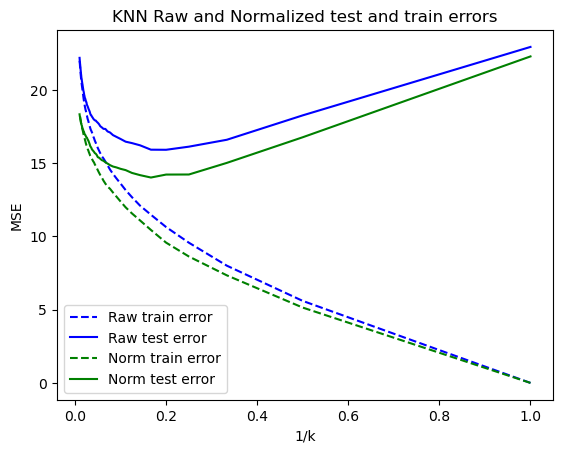

KNN raw min train error: 0.0, k: 1
KNN raw min test error: 15.908339734544178, k: 5
KNN normalized min train error: 0.0, k: 1
KNN normalized min test error: 14.014712621764268, k: 6


In [12]:
# using the same train/test split as before
# get the raw data
x_train_raw = train_df.drop('PE', axis=1)
x_test_raw = test_df.drop('PE', axis=1)

# normalized data
scaler = MinMaxScaler()
x_train_norm = scaler.fit_transform(x_train_raw)
x_test_norm = scaler.transform(x_test_raw)

train_err_raw, test_err_raw = [], []
train_err_norm, test_err_norm = [], []
for k in range(1, 101):
    knn_raw = KNeighborsRegressor(n_neighbors=k)
    knn_norm = KNeighborsRegressor(n_neighbors=k)

    # train knn models
    knn_raw.fit(x_train_raw, y_train)
    knn_norm.fit(x_train_norm, y_train)

    # get raw train and test errors
    train_err_raw.append(mean_squared_error(y_train, knn_raw.predict(x_train_raw)))
    test_err_raw.append(mean_squared_error(y_test, knn_raw.predict(x_test_raw)))

    # get normalized train and test errors
    train_err_norm.append(mean_squared_error(y_train, knn_norm.predict(x_train_norm)))
    test_err_norm.append(mean_squared_error(y_test, knn_norm.predict(x_test_norm)))


# plot raw train and test errors
plt.plot([1/k for k in range(1, 101)], train_err_raw, label='Raw train error', linestyle='--', color='blue')
plt.plot([1/k for k in range(1, 101)], test_err_raw, label='Raw test error', color='blue')

# plot normalized train and test errors
plt.plot([1/k for k in range(1, 101)], train_err_norm, label='Norm train error', linestyle='--', color='green')
plt.plot([1/k for k in range(1, 101)], test_err_norm, label='Norm test error', color='green')
plt.title('KNN Raw and Normalized test and train errors')
plt.xlabel('1/k')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Print lowest train/test errors and corresponding value of k
min_train_err_raw, min_k_train_err_raw = min(train_err_raw), np.argmin(train_err_raw) + 1
min_test_err_raw, min_k_test_err_raw = min(test_err_raw), np.argmin(test_err_raw) + 1
min_train_err_norm, min_k_train_err_norm = min(train_err_norm), np.argmin(train_err_norm) + 1
min_test_err_norm, min_k_test_err_norm = min(test_err_norm), np.argmin(test_err_norm) + 1

print(f'KNN raw min train error: {min_train_err_raw}, k: {min_k_train_err_raw}')
print(f'KNN raw min test error: {min_test_err_raw}, k: {min_k_test_err_raw}')
print(f'KNN normalized min train error: {min_train_err_norm}, k: {min_k_train_err_norm}')
print(f'KNN normalized min test error: {min_test_err_norm}, k: {min_k_test_err_norm}')

### (j ) Compare KNN and Linear

My linear regression with quadratic and interaction terms (and statistically insignificant terms dropped) is my best performing linear regressor. This has a test MSE of 17.8. Both my raw and normalized KNN regressors outperform this, with MSE's of 15.9 and 14.0 respectively.

So clearly, KNN Regression outperforms Linear Regression for this dataset. I believe this is due to the following reasons:

- Nonlinearity - There is some degree of nonlinearity in the data. This is made clear by fact that the complex model performs better than the basic model, as it includes quadratic terms which have p-values that are effectively at zero. Whilst this is an improvement on the basic model, it is entirely possible that there are even more complex, nonlinear patterns within the data that these quadratic terms are not able to capture. Evidence to support this idea is found in part (f), where we found that the introduction of cubic terms for some of the predictors was statistically significant. The KNN Regression model is naturally better suited to capture such nonlinearity.
- Interaction - On a similar note we saw in part (g) that some of the predictors in our dataset have statistically significant interactions. And while these pairwise interactions were included in the complex model which improved its MSE, there may also be higher order interactions that are not captured. Such interactions are captured inherently by the KNN model as it measure the multi-dimensional distance across these features.
- Noise - From our analysis in part (c), there is not a lot of noise in the data. Only a very small amount of points have been flagged as "outliers" in my influence plot, and these data points have been removed from the dataset as well. I believe this bodes well for the KNN, as it allows it essentially increases its performance for smaller values of k which allows it to be more precise (at the risk of overfitting). Our value of k, that minimizes the test error is 5, which supports this theory.
- Linear Regression assumptions - Linear Regression makes further assumptions about the data such as constant variance of errors, independence of error, and that errors are normally distributed. It may be true that such assumptions do not hold for this dataset which causes the KNN Regressor to outperform it.

It is important to note that the difference in MSE for the KNN Regression and Linear Regression is not massive, and the Linear Regression model does come with advantages such as better interpretability and scales better with added features.